In [57]:
import sys
sys.path.append('/Users/kelly/koskella_lab')
from tools import *

In [58]:
import plotly.express as px
def plot_timeseries_interactive(dataframe, title=None, legend_title="Series"):
    fig = px.scatter(dataframe, x=dataframe.index, y=dataframe.columns,
                     labels={'index': 'Time (hr)', 'value': 'OD reading', 'Series': legend_title},
                     title=title, color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_traces(marker=dict(size=7))
    fig.show()

In [59]:
df = pd.read_csv('/Users/kelly/Downloads/KH_RBG2_02282025.csv')
df = clean_and_transpose(df, 33, 131)
df1 = df.copy()

In [60]:
clean_df = remove_outliers(df, 1)
plot_timeseries_interactive(clean_df, 'Combined Growth Curve - outliers removed')

In [61]:
#split into 4 tables of technical replicates
table_1 = df.filter(regex=r'^[A-H][1-3]$') 
table_2 = df.filter(regex=r'^[A-H][4-6]$')
table_3 = df.filter(regex=r'^[A-H][7-9]$')
table_4 = df.filter(regex=r'^[A-H](10|11|12)$')

table_arr = [table_1, table_2, table_3, table_4]
avg_tables = []

#average every 3 wells
for df in table_arr:
    avg_df = df.groupby(df.columns.str[0], axis=1).mean()
    avg_tables.append(avg_df)

In [64]:
for i in range(1, 5):
    plot_timeseries_interactive(avg_tables[i-1], f'Biological Replicate - {i}', 'Technical Replicates')

## --- PFUs determined via phage titer on 3/3/3035 (~25.5 PFU on 10^-6 dil) ---

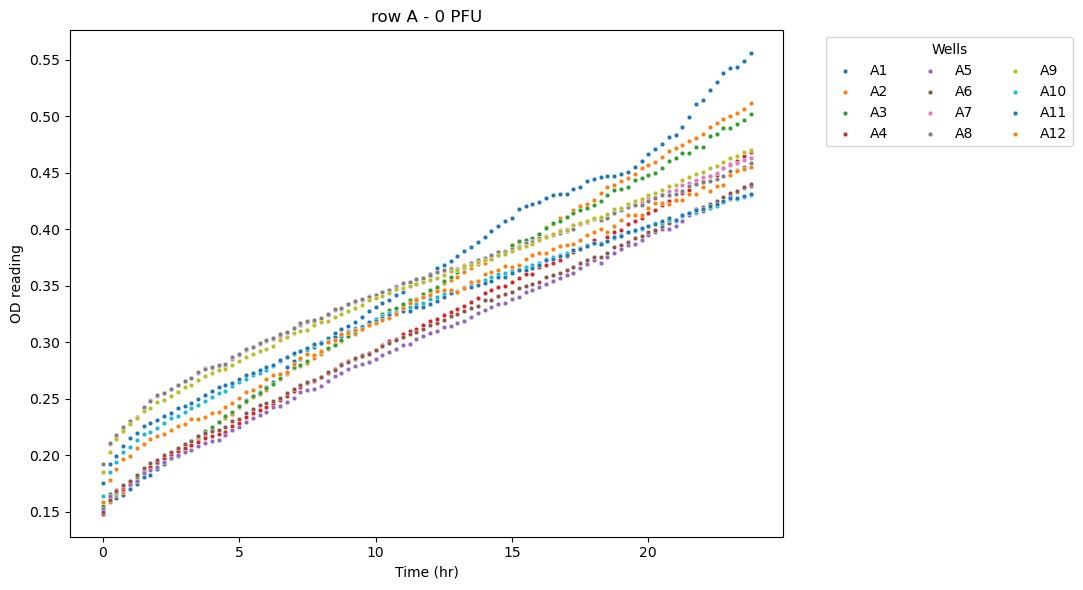

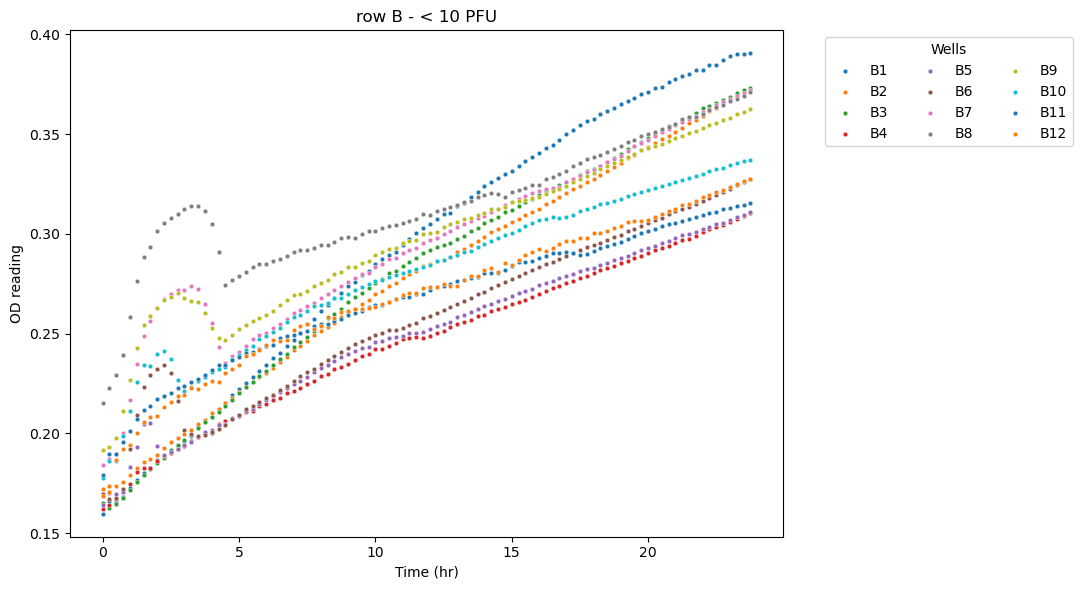

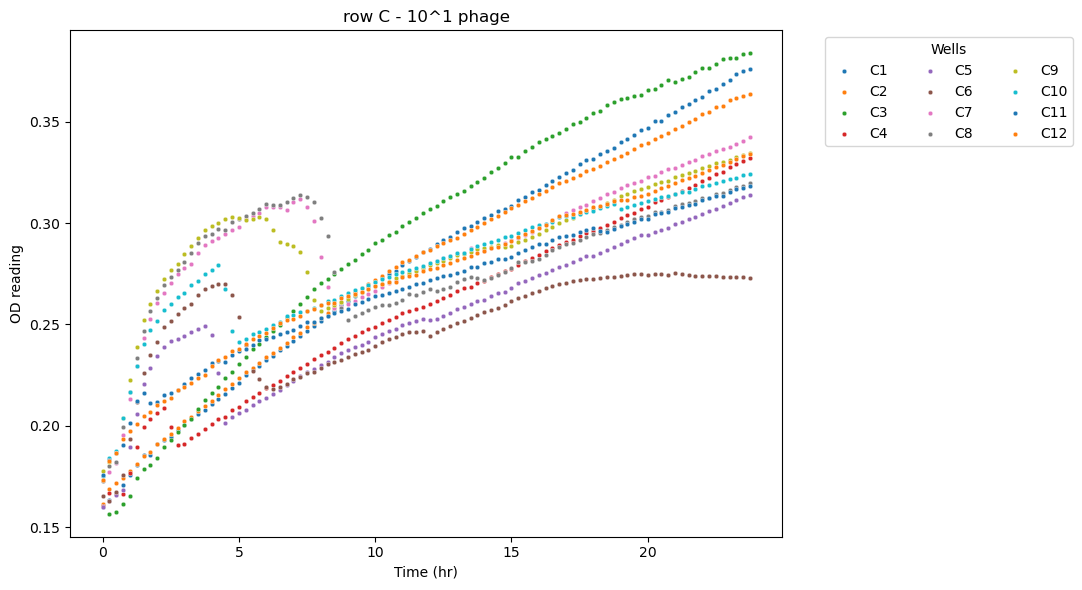

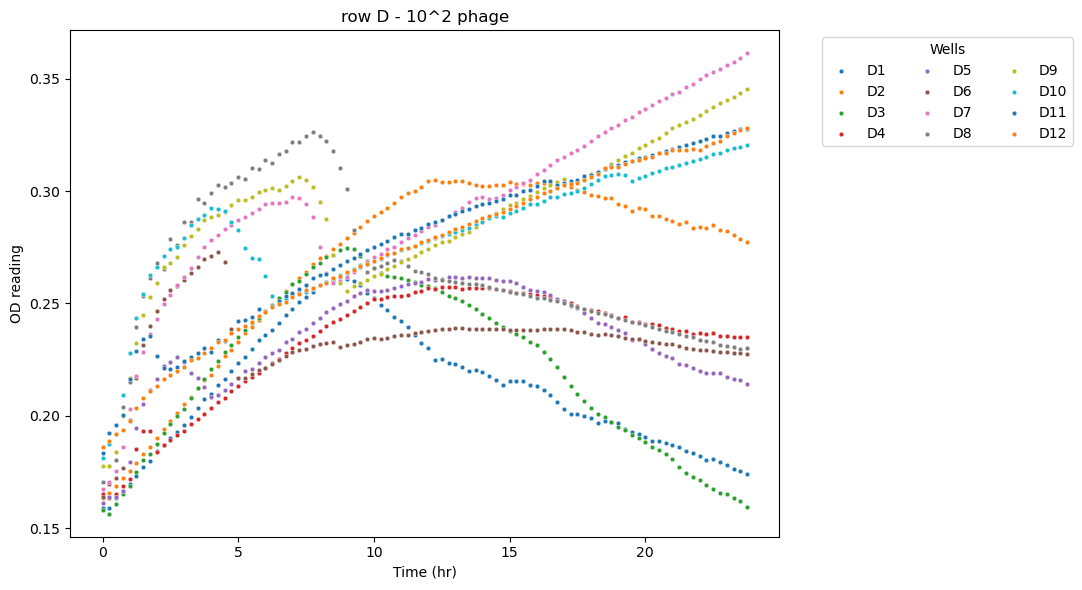

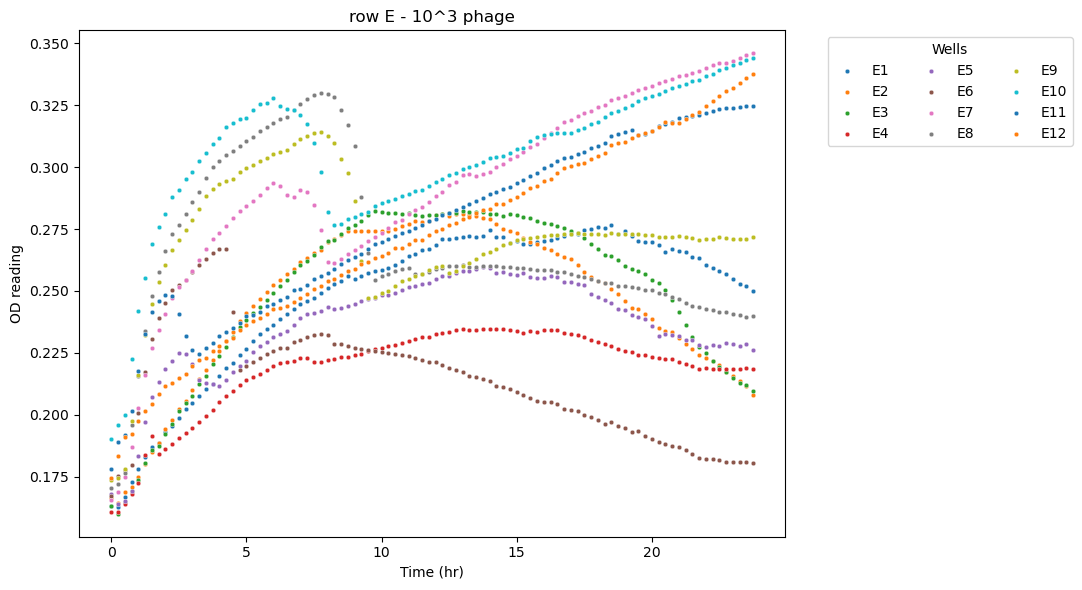

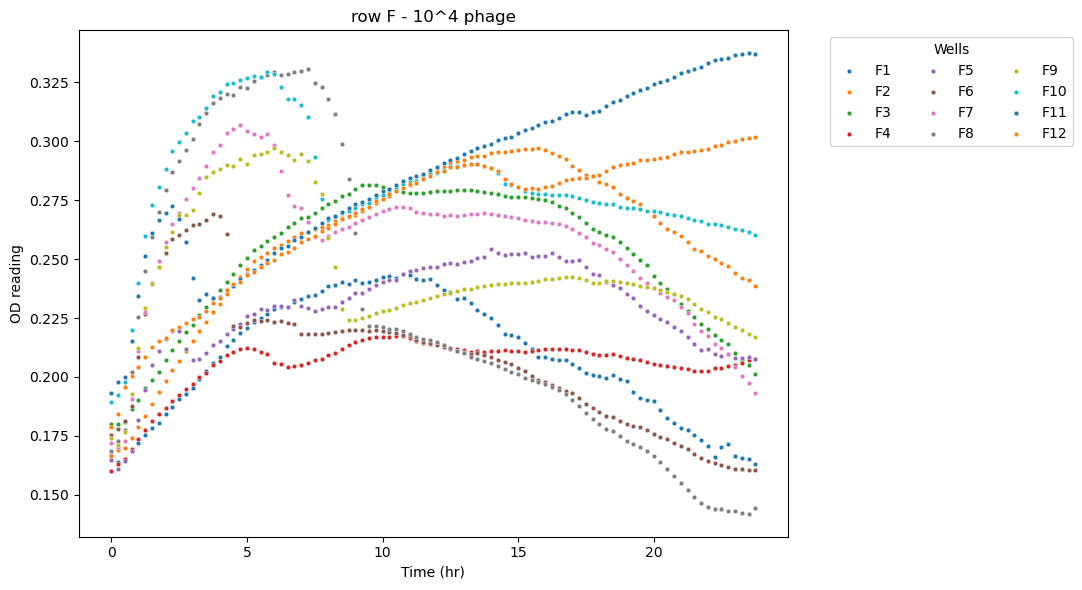

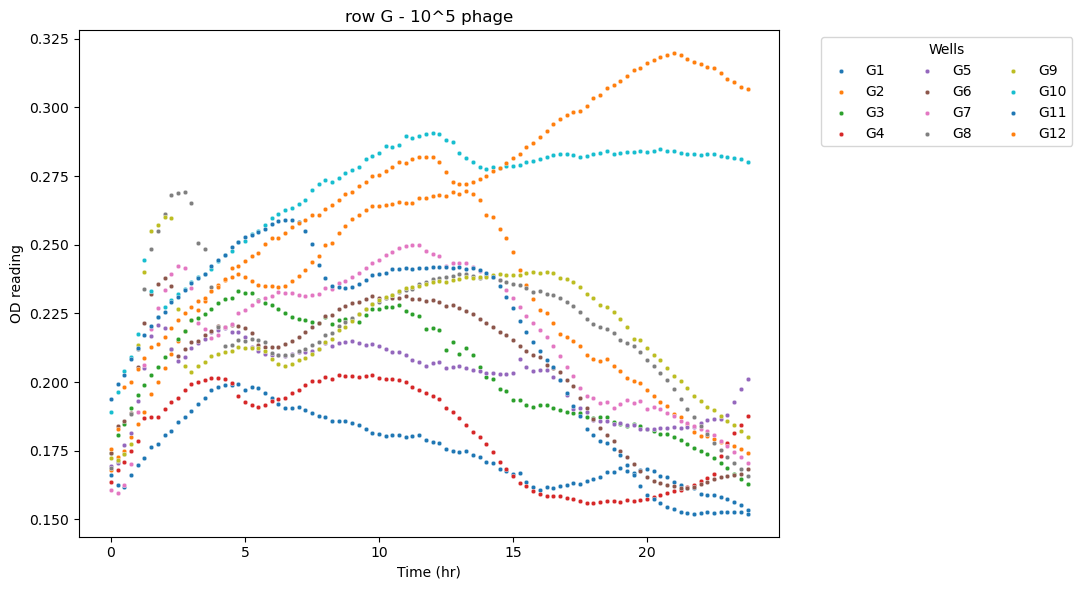

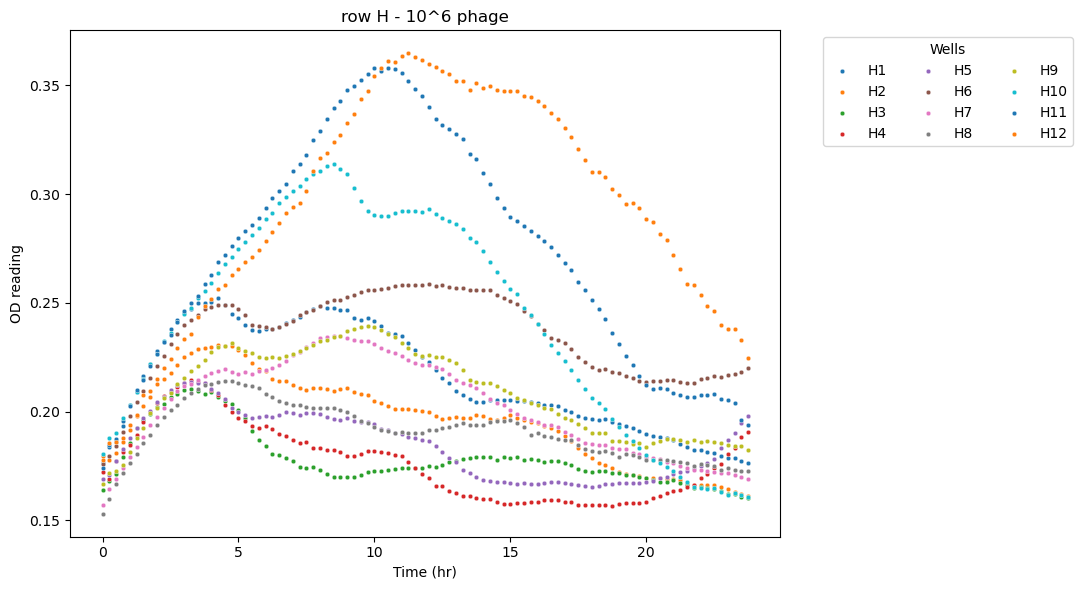

In [63]:
#plot all the different PFUs

list_char = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
tables = {}
num = -1

for char in list_char:
    tables[char] = df1.filter(regex=f'^{char}')
    if char == 'A':
        title = f'row {char} - 0 PFU'
    elif char == 'B':
        title = f'row {char} - < 10 PFU'
    else:
        title = f'row {char} - 10^{num} phage'
    plot_timeseries(tables[char], title, 'Wells')
    num+=1